## Final Project Submission

Please fill out:
* Student name: Laureen chepkoech
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy 
import sqlite3
conn = sqlite3.connect("im.db")

# Data understanding

In [5]:
# movie_basic table
q = ("""
SELECT *
FROM movie_basics;
""")
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#movie_rating table
q = ("""
SELECT *
FROM movie_ratings;
""")
pd.read_sql(q,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
#combining the columns basing on the movie_id
q = ("""
SELECT primary_title, genres,runtime_minutes, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
USING (movie_id)
WHERE averagerating > 5
ORDER BY averagerating DESC
LIMIT 20;
""")

pd.read_sql(q,conn) 

,primary_title,genres,runtime_minutes,averagerating,numvotes
0,The Paternal Bond: Barbary Macaques,Documentary,59.0,10.0,5
1,Requiem voor een Boom,Documentary,48.0,10.0,5
2,Freeing Bernie Baran,"Crime,Documentary",100.0,10.0,5
3,Hercule contre Hermès,Documentary,72.0,10.0,5
4,Pick It Up! - Ska in the '90s,Documentary,99.0,10.0,5
5,Revolution Food,Documentary,70.0,10.0,8
6,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,93.0,10.0,5
7,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,52.0,10.0,5
8,Dog Days in the Heartland,Drama,NaN,10.0,5
9,Fly High: Story of the Disc Dog,Documentary,65.0,10.0,7


In [ ]:
# checking for all the columns in the database
q="""
SELECT *
FROM movie_basics AS b
LEFT JOIN movie_ratings AS r
ON b.movie_id = r.movie_id
WHERE r.movie_id IS NOT NULL;
"""
table = pd.read_sql(q, conn)
table.head()

In [8]:
#looking into the overal data information
df = pd.read_sql(q, conn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    20 non-null     object 
 1   genres           20 non-null     object 
 2   runtime_minutes  17 non-null     float64
 3   averagerating    20 non-null     float64
 4   numvotes         20 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 932.0+ bytes


In [9]:
#checking for duplicates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [10]:
 # Write the SQL query to select rows with missing values
q = """
SELECT*
FROM movie_ratings 
WHERE averagerating IS NULL OR numvotes IS NULL;
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(q, conn)

# Check the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the result
print(missing_values_count)
  



movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64


In [11]:

 # Write the SQL query to select rows with missing values
q = """
SELECT*
FROM movie_basics 
WHERE primary_title IS NULL OR genres IS NULL OR runtime_minutes IS NULL ;
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(q, conn)

# Check the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the result
print(missing_values_count)
  

movie_id               0
primary_title          0
original_title        20
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [12]:
#checking for duplicates  in the movie_basics table
q = ("""
SELECT movie_id, primary_title, original_title, start_year, runtime_minutes, genres, COUNT(*) AS duplicate_count
FROM movie_basics
GROUP BY movie_id, primary_title, original_title, start_year, runtime_minutes, genres
HAVING COUNT(*) > 1;
""")
pd.read_sql(q,conn) 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,duplicate_count


# Data preperation

In [13]:
# checking for all the columns in the databas
# this will help in data cleaning
q="""
SELECT *
FROM movie_basics AS b
LEFT JOIN movie_ratings AS r
ON b.movie_id = r.movie_id;
"""
df = pd.read_sql(q, conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0


In [14]:
# Drop the rows with missing values from the DataFrame
df_cleaned = df.dropna()

# Check the number of missing values in each column in the cleaned DataFrame
missing_values_count_cleaned = df_cleaned.isnull().sum()

# Print the result
print(missing_values_count_cleaned)

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64


In [15]:
# Drop null values from the DataFrame
df.dropna(inplace=True)

# Alternatively, you can assign the result to a new DataFrame
df_cleaned = df.dropna()

# Print the cleaned DataFrame
print(df_cleaned)

         movie_id                    primary_title  \
0       tt0063540                        Sunghursh   
1       tt0066787  One Day Before the Rainy Season   
2       tt0069049       The Other Side of the Wind   
4       tt0100275         The Wandering Soap Opera   
7       tt0137204                  Joe Finds Grace   
...           ...                              ...   
146113  tt9911774        Padmavyuhathile Abhimanyu   
146114  tt9913056                     Swarm Season   
146115  tt9913084                 Diabolik sono io   
146122  tt9914286                Sokagin Çocuklari   
146134  tt9916160                       Drømmeland   

                    original_title  start_year  runtime_minutes  \
0                        Sunghursh        2013            175.0   
1                  Ashad Ka Ek Din        2019            114.0   
2       The Other Side of the Wind        2018            122.0   
4            La Telenovela Errante        2017             80.0   
7               

# Data visualization


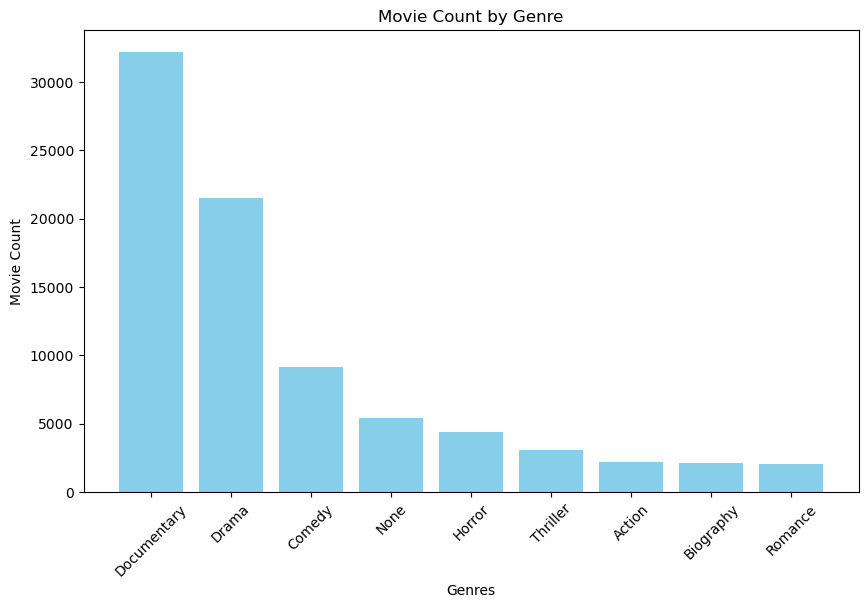

In [3]:
#top 10 genres from the movie_basics
import pandas as pd
import matplotlib.pyplot as plt

#i fetched data from the database
data = {
    'genres': ['Documentary', 'Drama', 'Comedy', 'None', 'Horror', 'Comedy', 'Thriller', 'Action', 'Biography','Romance'],
    'movie_count': [32185, 21486, 9177, 5408, 4372, 3519, 3046, 2219, 2115, 2079]
}

df = pd.DataFrame(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(df['genres'], df['movie_count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Movie Count')
plt.title('Movie Count by Genre')
plt.xticks(rotation=45)
plt.show()


In [29]:
#reading from tn.movie_budgets
movie_budget=pd.read_csv("tn.movie_budgets.csv")
print(movie_budget.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [30]:
# #reading from 
movie_gross=pd.read_csv("bom.movie_gross.csv")
print(movie_gross.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [31]:
 pd.read_csv("rt.movie_info.tsv", sep='\t', encoding='latin1')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [4]:
pd.read_csv("rt.reviews.tsv", sep='\t', encoding='latin1')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
